In [14]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sn
from sqlalchemy import create_engine

import scipy.stats as st
from scipy.stats import linregress

In [15]:
file = "Resources/whr2021.csv"
file2 = "Resources/whrold.csv"
coorfile = "Resources/coordinates.csv"

In [16]:
WHR = pd.read_csv(file)
print(len(WHR))
WHR.head(10)


149


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


In [17]:
WHR = WHR.dropna()
print(len(WHR))
WHR.head()

149


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


# Set Index

In [18]:
newindex = WHR.set_index("Country name")
newindex.head()

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


# Making new column for ResidualX

In [19]:
newindex["Residual X"] = ((newindex["Dystopia + residual"]) - (newindex["Ladder score in Dystopia"]))
newindex.head()

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Residual X
Country name,,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,0.823
Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,0.438
Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,0.409
Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,0.537
Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,0.368


In [20]:
renamed_df = newindex.reset_index()
renamed_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Residual X
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,0.823
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,0.438
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,0.409
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,0.537
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,0.368


# Grouping by region to get averages

In [21]:
region_df = renamed_df.groupby(["Regional indicator"]).mean("Ladder score")
region_df.head()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Residual X
Regional indicator,,,,,,,,,,,,,,,,,,,
Central and Eastern Europe,5.984765,0.048471,6.079941,5.889529,10.109059,0.887412,68.338412,0.797059,-0.078941,0.850529,2.43,1.213588,0.957235,0.625529,0.505353,0.136353,0.056588,2.490000,0.060000
Commonwealth of Independent States,5.467000,0.046750,5.558417,5.375250,9.401833,0.872500,65.009500,0.816917,-0.036000,0.725083,2.43,0.966500,0.923500,0.520583,0.529500,0.164583,0.136667,2.225750,-0.204250
East Asia,5.810333,0.040000,5.889500,5.731667,10.367667,0.860500,71.252167,0.763500,-0.062333,0.683333,2.43,1.304000,0.896667,0.717333,0.464667,0.147333,0.163000,2.117833,-0.312167
Latin America and Caribbean,5.908050,0.073900,6.052800,5.763150,9.370000,0.839500,67.076050,0.831750,-0.067700,0.792600,2.43,0.955400,0.848900,0.585800,0.547550,0.143700,0.093650,2.733000,0.303000
Middle East and North Africa,5.219765,0.057000,5.331176,5.108059,9.666118,0.797647,65.609118,0.716471,-0.079765,0.762235,2.43,1.058882,0.754588,0.539529,0.407353,0.135765,0.113000,2.210588,-0.219412


In [22]:
region_df = region_df.drop(columns= ["Standard error of ladder score", "upperwhisker", "lowerwhisker", "Logged GDP per capita", "Social support",
                                    "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Ladder score in Dystopia", "Explained by: Log GDP per capita",
                                    "Explained by: Social support", "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices", "Explained by: Generosity","Explained by: Perceptions of corruption", "Dystopia + residual", "Residual X"])
region_df.head()

,Ladder score
Regional indicator,
Central and Eastern Europe,5.984765
Commonwealth of Independent States,5.467000
East Asia,5.810333
Latin America and Caribbean,5.908050
Middle East and North Africa,5.219765


In [23]:
region_df = region_df.reset_index()
region_df = region_df.rename(columns={"Regional indicator": "Regional_indicator", "Ladder score": "Happiness_score"})
region_df.head()

,Regional_indicator,Happiness_score
0,Central and Eastern Europe,5.984765
1,Commonwealth of Independent States,5.467000
2,East Asia,5.810333
3,Latin America and Caribbean,5.908050
4,Middle East and North Africa,5.219765


In [24]:
# from django import db
# db.connections.close_all()

In [25]:
# engine = create_engine("sqlite:///data/SQLProject2.db")


# region_df.to_sql("Region_Happiness", con=engine, index=False, if_exists='append')

# Renaming Columns

In [26]:
renamed_df = renamed_df.rename(columns={"Country name": "Country_name", "Regional indicator": "Regional_indicator", "Ladder score": "Ladder_score", "Standard error of ladder score": "Standard_error_of_ladder_score", 'Logged GDP per capita': 'Logged_GDP_per_capita',
       'Social support': 'Social_support', 'Healthy life expectancy': 'Healthy_life_expectancy' ,
       'Freedom to make life choices':'Freedom_to_make_life_choices',
       'Perceptions of corruption': 'Perceptions_of_corruption', 'Ladder score in Dystopia': 'Ladder_score_in_Dystopia',
       'Explained by: Log GDP per capita': 'Explained_by_Log_GDP_per_capita', 'Explained by: Social support': 'Explained_by_Social_support',
       'Explained by: Healthy life expectancy': 'Explained_by_Healthy_life_expectancy',
       'Explained by: Freedom to make life choices': 'Explained_by_Freedom_to_make_life_choices',
       'Explained by: Generosity': 'Explained_by_Generosity', 'Explained by: Perceptions of corruption': 'Explained_by_Perceptions_of_corruption',
       'Dystopia + residual': 'Dystopia_residual', 'Residual X': 'Residual_X'})

renamed_df.head()

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,...,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by_Log_GDP_per_capita,Explained_by_Social_support,Explained_by_Healthy_life_expectancy,Explained_by_Freedom_to_make_life_choices,Explained_by_Generosity,Explained_by_Perceptions_of_corruption,Dystopia_residual,Residual_X
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,0.823
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,0.438
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,0.409
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,0.537
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,0.368


# Lat/Long additions

In [27]:
coors = pd.read_csv(coorfile)
print(len(coors))
coors.head()

245


,latitude,longitude,name
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla


In [28]:
coors = coors.rename(columns={"name": "Country_name"})
coors.head()

,latitude,longitude,Country_name
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla


In [29]:
merged_df = renamed_df.merge(coors, how="inner", on="Country_name")
print(len(merged_df))
merged_df.head(150)

142


,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,...,Explained_by_Log_GDP_per_capita,Explained_by_Social_support,Explained_by_Healthy_life_expectancy,Explained_by_Freedom_to_make_life_choices,Explained_by_Generosity,Explained_by_Perceptions_of_corruption,Dystopia_residual,Residual_X,latitude,longitude
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,...,1.446,1.106,0.741,0.691,0.124,0.481,3.253,0.823,61.924110,25.748151
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,...,1.502,1.108,0.763,0.686,0.208,0.485,2.868,0.438,56.263920,9.501785
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,...,1.566,1.079,0.816,0.653,0.204,0.413,2.839,0.409,46.818188,8.227512
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,...,1.482,1.172,0.772,0.698,0.293,0.170,2.967,0.537,64.963051,-19.020835
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,...,1.501,1.079,0.753,0.647,0.302,0.384,2.798,0.368,52.132633,5.291266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,...,0.451,0.731,0.007,0.405,0.103,0.015,1.800,-0.630,-29.609988,28.233608
138,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,...,1.099,0.724,0.340,0.539,0.027,0.088,0.648,-1.782,-22.328474,24.684866
139,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,...,0.364,0.202,0.407,0.627,0.227,0.493,1.095,-1.335,-1.940278,29.873888
140,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,...,0.457,0.649,0.243,0.359,0.157,0.075,1.205,-1.225,-19.015438,29.154857


In [30]:
# engine = create_engine("sqlite:///data/SQLProject2.db")


# merged_df.to_sql("WHR2021", con=engine, index=False, if_exists='append')

# Making correlation Matrix

In [31]:
correlation_df = renamed_df.drop(columns =["Country_name","Generosity", "Regional_indicator", "Standard_error_of_ladder_score", "upperwhisker", "lowerwhisker", "Logged_GDP_per_capita", "Social_support", "Healthy_life_expectancy", "Freedom_to_make_life_choices", "Perceptions_of_corruption", "Ladder_score_in_Dystopia", "Residual_X"])
correlation_df.head()

,Ladder_score,Explained_by_Log_GDP_per_capita,Explained_by_Social_support,Explained_by_Healthy_life_expectancy,Explained_by_Freedom_to_make_life_choices,Explained_by_Generosity,Explained_by_Perceptions_of_corruption,Dystopia_residual
0,7.842,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,7.620,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,7.571,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,7.554,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,7.464,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [32]:
correlation_df = correlation_df.rename(columns={"Ladder_score": "Happiness Score", "Explained_by_Log_GDP_per_capita": "GDP per Capita", "Explained_by_Social_support": "Social Support", "Explained_by_Healthy_life_expectancy": "Healthy Life Expectancy", "Explained_by_Freedom_to_make_life_choices": "Freedom to make life choices", "Explained_by_Generosity": "Generosity", "Explained_by_Perceptions_of_corruption": "Perception of Corruption", "Dystopia_residual": "Dystopia + Residual Score"})
correlation_df.head()

,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to make life choices,Generosity,Perception of Corruption,Dystopia + Residual Score
0,7.842,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,7.620,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,7.571,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,7.554,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,7.464,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [33]:
def plot_corr(df,size=10):
#     '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

#     Input:
#         df: pandas DataFrame
#         size: vertical and horizontal size of the plot'''

    corr = correlation_df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
    return plot_corr

<IPython.core.display.Javascript object>


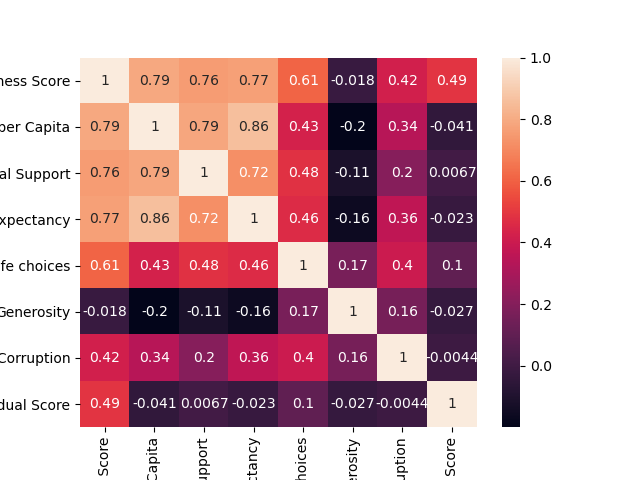

In [34]:
corr = correlation_df.corr()
# print(corrMatrix)
sn.heatmap(corr, annot=True)
# figure size in inches

plt.show()

# Turning DF into html

In [35]:
cleanhtml_df = renamed_df.drop(columns =["Generosity", "Regional_indicator", "Standard_error_of_ladder_score", "upperwhisker", "lowerwhisker", "Logged_GDP_per_capita", "Social_support", "Healthy_life_expectancy", "Freedom_to_make_life_choices", "Perceptions_of_corruption", "Ladder_score_in_Dystopia", "Residual_X"])
cleanhtml_df.head()



,Country_name,Ladder_score,Explained_by_Log_GDP_per_capita,Explained_by_Social_support,Explained_by_Healthy_life_expectancy,Explained_by_Freedom_to_make_life_choices,Explained_by_Generosity,Explained_by_Perceptions_of_corruption,Dystopia_residual
0,Finland,7.842,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,7.620,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,7.571,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,7.554,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,7.464,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [36]:
cleanhtml_df = cleanhtml_df.rename(columns={"Country_name": "Country Name", "Ladder_score": "Ladder Score", "Explained_by_Log_GDP_per_capita": "GDP per Capita", "Explained_by_Social_support": "Social Support", "Explained_by_Healthy_life_expectancy": "Healthy Life Expectancy", "Explained_by_Freedom_to_make_life_choices": "Freedom to make life choices", "Explained_by_Generosity": "Generosity", "Explained_by_Perceptions_of_corruption": "Perception of Corruption", "Dystopia_residual": "Dystopia + Residual Score"})
cleanhtml_df = cleanhtml_df.set_index("Country Name")
cleanhtml_df.head()

,Ladder Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom to make life choices,Generosity,Perception of Corruption,Dystopia + Residual Score
Country Name,,,,,,,,
Finland,7.842,1.446,1.106,0.741,0.691,0.124,0.481,3.253
Denmark,7.620,1.502,1.108,0.763,0.686,0.208,0.485,2.868
Switzerland,7.571,1.566,1.079,0.816,0.653,0.204,0.413,2.839
Iceland,7.554,1.482,1.172,0.772,0.698,0.293,0.170,2.967
Netherlands,7.464,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [37]:
html = cleanhtml_df.to_html()
print(html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Ladder Score</th>
      <th>GDP per Capita</th>
      <th>Social Support</th>
      <th>Healthy Life Expectancy</th>
      <th>Freedom to make life choices</th>
      <th>Generosity</th>
      <th>Perception of Corruption</th>
      <th>Dystopia + Residual Score</th>
    </tr>
    <tr>
      <th>Country Name</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>Finland</th>
      <td>7.842</td>
      <td>1.446</td>
      <td>1.106</td>
      <td>0.741</td>
      <td>0.691</td>
      <td>0.124</td>
      <td>0.481</td>
      <td>3.253</td>
    </tr>
    <tr>
      <th>Denmark</th>
      <td>7.620</td>
      <td>1.502</td>
      <td>1.108</td>
      <td>0.763</td>
      <td>0.686</td>
      <td>0.208</td>
      <td>0.485</td>
      <td>2.868</td>
    </t

In [38]:
# engine = create_engine("sqlite:///SQLProject2.db")


# renamed_df.to_sql("WHR2021", con=engine, index=False, if_exists='append')